In [21]:
#Import necessary libraries
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Download dataset
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [23]:
#load dataset
csv_file = os.path.join(path, "data.csv")
breast = pd.read_csv(csv_file)

In [24]:
# Inspect the dataset
print(breast.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [25]:
print("Shape:", breast.shape)

Shape: (569, 33)


In [26]:
print("infor:",breast.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:
print("Missing values:")
print(breast.isnull().sum())

Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst

In [28]:
# Clean dataset
print(breast.drop('Unnamed: 32', axis=1, inplace=True))

None


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
breast['diagnosis'] = le.fit_transform(breast['diagnosis']) 

0:benign & 1:malignant  diagnosis
0    357
1    212
Name: count, dtype: int64


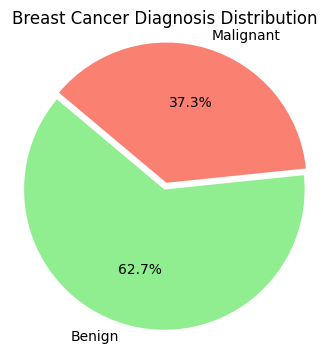

In [30]:
import matplotlib.pyplot as plt

# Count of each class
diagnosis_counts = breast['diagnosis'].value_counts()
print("0:benign & 1:malignant ",breast['diagnosis'].value_counts())
labels = ['Benign', 'Malignant']
colors = ['lightgreen', 'salmon']

# Plot pie chart
plt.figure(figsize=(4, 4))
plt.pie(diagnosis_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=[0, 0.05])
plt.title('Breast Cancer Diagnosis Distribution')
plt.axis('equal')  # Equal aspect ratio makes the pie a circle
plt.show()


In [31]:
#Prepare features and target
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']


In [33]:
# Split into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
#to check data allocation after sp
print("train data:", X_train.shape)
print("test data", X_test.shape)

train data: (455, 31)
test data (114, 31)


In [36]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#Train logistic regression model

lr = LogisticRegression()
lr.fit(X_train, y_train)
# Evaluate accuracy

y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', accuracy_lr)


Logistic Regression Accuracy: 0.9736842105263158


In [56]:
# to find the input ,run
#X_test[100]

array([-0.23701949,  0.44801735,  0.26399534,  0.38352127,  0.3165181 ,
        0.01624841, -0.29819657, -0.28934238,  0.09495755, -0.70286709,
       -1.00902334, -0.11354384, -0.09736053, -0.21859275,  0.01925851,
       -0.77389719, -0.16170237, -0.41368953, -0.33829765, -0.62520312,
       -0.49943293,  0.80626615,  1.20234056,  0.66581379,  0.69132154,
        0.42797477,  0.65845818,  0.07460721,  0.61172679,  0.84331464,
        0.13698205])

In [38]:
# Predict using custom input

input_text = (-0.23717126, -0.64487029, -0.11382239, -0.57427777, -0.60294971,
        1.0897546 ,  0.91543814,  0.41448279,  0.09311633,  1.78465117,
        2.11520208,  0.28454765, -0.31910982,  0.2980991 ,  0.01968238,
       -0.47096352,  0.45757106,  0.28733283, -0.23125455,  0.26417944,
        0.66325388,  0.12170193,  0.42656325,  0.36885508,  0.02065602,
        1.39513782,  2.0973271 ,  2.01276347,  0.61938913,  2.9421769 ,
        3.15970842)

np_df = np.asarray(input_text).reshape(1, -1)
pred = lr.predict(np_df)

if pred[0] == 1:
    print("Cancrous (Malignant)")
else:
    print("Not Cancrous (Benign)")
    

Cancrous (Malignant)


In [39]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [40]:
#to download the model.pkl  to make web app
from IPython.display import FileLink
FileLink('model.pkl')


/kaggle/working/model.pkl

In [41]:
# download the scaler.pkl to make web app
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
from IPython.display import FileLink
FileLink('scaler.pkl')


/kaggle/working/scaler.pkl